<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Ознакомимся с данными.

In [2]:
test_frame = pd.read_csv("gold_recovery_test_new.csv")
train_frame = pd.read_csv("gold_recovery_train_new.csv")
full_frame = pd.read_csv("gold_recovery_full_new.csv")

train_frame = train_frame.replace(float("-inf"),np.nan)
test_frame = test_frame.replace(float("-inf"),np.nan)

In [3]:
df_train = pd.read_csv('gold_recovery_train_new.csv')
df_test = pd.read_csv('gold_recovery_test_new.csv')
df = pd.read_csv('gold_recovery_full_new.csv')

print('train_frame')
display(train_frame.sample(5))
train_frame.info()
print()
print('----------------------------------------------------------------')
print('test_frame')
display(test_frame.sample(5))
test_frame.info()
print()
print('----------------------------------------------------------------')
print('full_frame')
display(full_frame.sample(5))
full_frame.info()

train_frame


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13370,2018-07-06 07:59:59,3.341938,9.191585,4.927709,34.251193,56.687189,10.564733,2.898134,4.305801,1.750671,70.404417,6.008604,7.63,0.707223,6.413587,13.768561,5.982710,31.269691,24.715810,6.503055,NaN,2.975160,1499.123089,-500.720467,1500.233939,-500.487413,1500.813374,-502.447981,1500.413166,-500.542468,43317.155804,2815.137833,2815.201496,1.023014,5.500892,3.703265,400.154776,55.964000,26.976559,3.788490,4.404527,5.597455,4.404455,5.592125,12.336340,12.412067,31.016738,19.291682,88.029403,4.318836,0.214562,14.435967,0.548288,999.277575,-299.840438,1098.897539,-499.880614,1101.000727,-500.025683,995.392092,-500.258709,899.326009,-500.015904,899.784594,-499.891613,17.534358,11.836825,NaN,2.482399,32.998667,-499.971718,28.061598,-499.729494,33.038965,-499.991518,25.003750,-500.047076,24.992209,-501.606870,20.019550,-480.573303,17.966806,-500.681146,12.999763,-500.023362,12.973750,-499.905313
7111,2017-04-26 05:59:59,5.049343,11.320401,10.748607,44.087103,67.281786,7.544563,2.737635,11.847079,2.424566,144.527900,5.494647,7.08,0.408651,8.496923,9.999434,6.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3598,2017-10-18 02:59:59,168.738620,6.555377,5.980000,2.244719,1497.916441,-499.911965,1501.523693,-484.709064,1501.283701,-510.849812,1499.959510,-499.920678,7.461132,3.706454,537.916264,59.300067,43.571163,8.217272,16.004208,5.668063,16.000224,5.575112,999.232799,-300.244414,1102.744882,-500.965361,1046.063047,-501.326782,996.109991,-500.481008,898.860131,-500.229588,899.884217,-501.860929,24.958122,-501.983600,22.955823,-500.463704,2.202902e+01,-499.668133,2.001486e+01,-499.980012,17.970456,-501.367997,16.036509,-400.299511,12.924007,-499.622302,10.012437,-500.054381,13.978302,-500.286138
3853,2017-10-29 09:59:59,191.209563,12.050437,6.890000,2.006207,1601.959356,-500.499735,1600.186190,-483.925352,1595.971667,-535.820991,1600.371956,-497.962195,11.255878,3.111396,631.599493,57.255926,44.856559,8.905179,17.000903,6.499524,16.995073,6.498047,1299.641913,-300.002191,1150.711419,-498.887770,1098.871252,-500.175198,999.398292,-500.909752,949.245597,-500.971227,950.148455,-500.648670,29.077659,-499.721357,26.030460,-499.735242,2.497880e+01,-498.569515,2.300441e+01,-499.957059,18.004345,-499.400458,16.081745,-499.397307,15.007432,-499.349689,11.049338,-499.909322,16.018597,-499.776686
849,2016-10-16 10:59:59,202.499613,15.044649,7.440000,1.008126,1603.480293,-500.440915,1697.197094,-499.834965,1701.524546,-499.307212,1701.291866,-500.204834,11.890805,4.521421,459.244684,45.849076,38.074159,11.659416,15.032630,7.300726,14.986973,7.302406,952.077471,-499.888134,1181.652488,-361.415240,1393.701560,-346.397621,1349.207379,-346.814983,1145.219332,-383.420432,1047.823161,-402.223455,30.063187,-499.813575,24.938707,-500.802981,3.302297e+01,-500.363643,3.104959e+01,-499.963163,17.937457,-501.638058,13.392471,-500.416868,8.222427,-498.021822,11.833562,-496.949872,17.007536,-497.598428
1802,2016-11-26 06:59:59,181.152246,7.049062,6.851667,1.751626,1599.452089,-500.077488,1604.029238,-500.186255,1598.728972,-499.996088,1599.694717,-499.806715,9.588351,3.295245,433.342317,44.057332,35.312311,9.151501,13.501749,6.499229,13.497493,6.500841,1001.089775,-499.939609,1348.604538,-450.621644,1351.149407,-4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
11943,2017-08-12 06:59:59,4.529915,10.469550,7.396741,46.971644,51.745184,6.643524,3.077034,10.190475,3.174374,107.823685,3.989446,6.440000,0.746510,6.744046,9.614531,4.731525,35.451976,13.331527,2.539259,6.487828,5.448596,1301.797881,-500.662965,1296.649203,-500.164199,1298.557467,-500.782655,1221.297674,-517.175271,44950.566334,5619.641348,5618.455642,1.982803,5.921561,3.093521,412.916583,49.374494,29.628713,6.133843,17.000526,5.998907,17.000457,6.000985,8.707101,8.905962,29.279417,20.840668,81.646531,4.720104,0.661217,15.887238,1.481871,1002.382236,-300.183637,1301.076328,-499.925896,1302.590546,-499.982100,1211.407026,-500.212854,951.132701,-499.928214,951.475080,-499.325441,15.652422,8.592697,2.972542,5.413144,26.133291,-500.046218,20.003171,-562.670657,19.959770,-500.033728,14.980476,-500.728408,13.020451,-502.218120,10.106837,-401.069377,12.017857,-498.070948,9.974862,-515.181718,14.978223,-499.859220
5462,2016-10-13 13:59:59,5.655099,8.157199,12.124658,47.051050,66.129778,11.218171,2.898067,12.069255,4.190615,179.526149,13.975244,8.180000,0.852527,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Проверим корректность расчета параметра recovery.

In [4]:
def recovery(row):
    (input_au, output_au, output_tail) = (row["rougher.input.feed_au"],
                                          row["rougher.output.concentrate_au"],
                                          row["rougher.output.tail_au"])
    recovery_value = (((output_au) * ((input_au) - (output_tail)))/
                       (((input_au) * ((output_au) - (output_tail))))) * 100
    return recovery_value

test = df_train.dropna(subset = ['rougher.input.feed_au',
                                'rougher.output.concentrate_au',
                                'rougher.output.tail_au',
                                'rougher.output.recovery'],axis = 0).apply(recovery,axis = 1)

print('MAE =', MAE(df_train.dropna(subset = ['rougher.input.feed_au',
                                            'rougher.output.concentrate_au',
                                            'rougher.output.tail_au',
                                            'rougher.output.recovery'])['rougher.output.recovery'],test))

MAE = 9.73512347450521e-15


Значение ошибки очень мало, из чего делаем вывод, что рассчёты проведены верно.

Проанализируем признаки, недоступные в тестовой выборке.

In [5]:
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_columns = [i for i in df_train.columns if i not in df_test.columns]

for i in list_columns:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1
display(list_columns)   
display(type_step, step, data)                      

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Counter({'output': 30, 'calculation': 4})

Counter({'final': 9,
         'primary_cleaner': 8,
         'rougher': 13,
         'secondary_cleaner': 4})

Counter({'concentrate_ag': 3,
         'concentrate_pb': 3,
         'concentrate_sol': 3,
         'concentrate_au': 3,
         'recovery': 2,
         'tail_ag': 4,
         'tail_pb': 4,
         'tail_sol': 4,
         'tail_au': 4,
         'sulfate_to_au_concentrate': 1,
         'floatbank10_sulfate_to_au_feed': 1,
         'floatbank11_sulfate_to_au_feed': 1,
         'au_pb_ratio': 1})

В тестовой выборке недоступны:
* расчетные параметры, получаемые из других данных (такие как rougher.calculation и final.output.recovery)
* измеряемые, получаемые в процессе обработки (такие как final.output.concentrate_au и rougher.output.tail_sol)
* целевые признаки rougher.output.recovery и final.output.recovery

Выведем количество пропусков по всем датасетам:

In [6]:
print('Пропуски в test_frame:', test_frame.isna().sum().sum())
print('Пропуски в train_frame:', train_frame.isna().sum().sum())
print('Пропуски в full_frame:', full_frame.isna().sum().sum())

Пропуски в test_frame: 90
Пропуски в train_frame: 4100
Пропуски в full_frame: 4481


Заполним пропуски.

In [7]:
train_frame = train_frame.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)

imputer = KNNImputer()
without_nan = pd.DataFrame(data = imputer.fit_transform(train_frame.drop(['date'],axis = 1)),
             columns= train_frame.drop(['date'],axis = 1).columns,
             index = train_frame.index)

test_frame = test_frame.dropna(subset= ['date'],axis = 0)
test_frame_for_target = test_frame.merge(full_frame.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
test_frame_for_target = test_frame_for_target.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)
test_frame = test_frame_for_target.loc[:,test_frame.columns]
target_test_rougher = test_frame_for_target["rougher.output.recovery"]
target_test_final = test_frame_for_target["final.output.recovery"]
test_frame = test_frame.drop("date",axis =1)

imputer_test = KNNImputer()
test_without_nan = pd.DataFrame(data = imputer_test.fit_transform(test_frame),
             columns= test_frame.columns,
             index = test_frame.index)

## Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

In [8]:
print("Суммарная концентрация металлов на различных этапах отчистки.")
print()

print("Концентрация до флотации")
print("Концентрация золота:{: 0.2f}, серебра:{: 0.2f}, свинца:{: 0.2f}".
format(without_nan["rougher.input.feed_au"].mean(),
       without_nan["rougher.input.feed_ag"].mean(),
       without_nan["rougher.input.feed_pb"].mean(),))
print()

print("Концентрация после флотации")
print("Коцентрация золота:{: 0.2f}, серебра:{: 0.2f}, свинца:{: 0.2f}".
format(without_nan["rougher.output.concentrate_au"].mean(),
       without_nan["rougher.output.concentrate_ag"].mean(),
       without_nan["rougher.output.concentrate_pb"].mean()))
print()

print("Концентрация после первичной очистки")
print("Концентрация золота:{: 0.2f}, серебра:{: 0.2f}, свинца:{: 0.2f}".
format(without_nan["primary_cleaner.output.concentrate_au"].mean(),
       without_nan["primary_cleaner.output.concentrate_ag"].mean(),
       without_nan["primary_cleaner.output.concentrate_pb"].mean()))
print()

print("Концентрация поле вторичной очистки")
print("Концентрация золота:{: 0.2f}, серебра:{: 0.2f}, свинца:{: 0.2f}".
format(without_nan["final.output.concentrate_au"].mean(),
       without_nan["final.output.concentrate_ag"].mean(),
       without_nan["final.output.concentrate_pb"].mean()))

Суммарная концентрация металлов на различных этапах отчистки.

Концентрация до флотации
Концентрация золота: 7.87, серебра: 8.58, свинца: 3.52

Концентрация после флотации
Коцентрация золота: 19.44, серебра: 11.78, свинца: 7.66

Концентрация после первичной очистки
Концентрация золота: 32.39, серебра: 8.20, свинца: 9.58

Концентрация поле вторичной очистки
Концентрация золота: 44.00, серебра: 5.14, свинца: 10.13


Напишем функцию, которая выводит распределение средних значений концетрации металлов на различных этапах отчистки.
Этапы отчистки будут показываться следующими цветами:
* Синий: концентрация до флотрации.
* Зелёный: концентрация после флотрации.
* Жёлтый: первичная отчистка.
* Красный: вторичная отчистка.

In [9]:
def concentration_plot(columns, title_name):
    colors = ['blue', 'green', 'orange', 'red']
    plt.figure(figsize=(17,5))
    for i in range(len(columns)):
        sns.distplot(without_nan[columns[i]], color=colors[i]).set(xlabel='Среднее по значениям', 
                                                                   ylabel='Плотность частоты', 
                                                                   title=title_name);

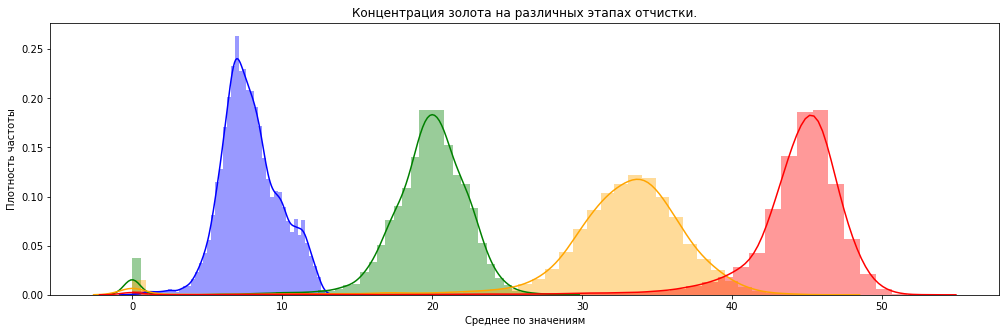

In [10]:
concentration_plot(['rougher.input.feed_au', 
                    'rougher.output.concentrate_au', 
                    'primary_cleaner.output.concentrate_au', 
                    'final.output.concentrate_au'], 
                    'Концентрация золота на различных этапах отчистки.')

После каждого этапа отчистки концентрация золота растёт.

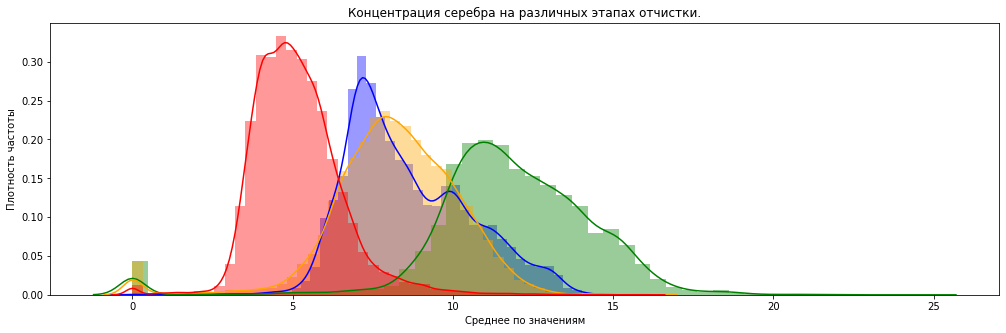

In [11]:
concentration_plot(['rougher.input.feed_ag', 
                    'rougher.output.concentrate_ag', 
                    'primary_cleaner.output.concentrate_ag', 
                    'final.output.concentrate_ag'], 
                    'Концентрация серебра на различных этапах отчистки.')

После флотрации концентрация серебра растёт, но после первичной и вторичной отчистки падает. После вторичной отчистки, концентрация минимальная.

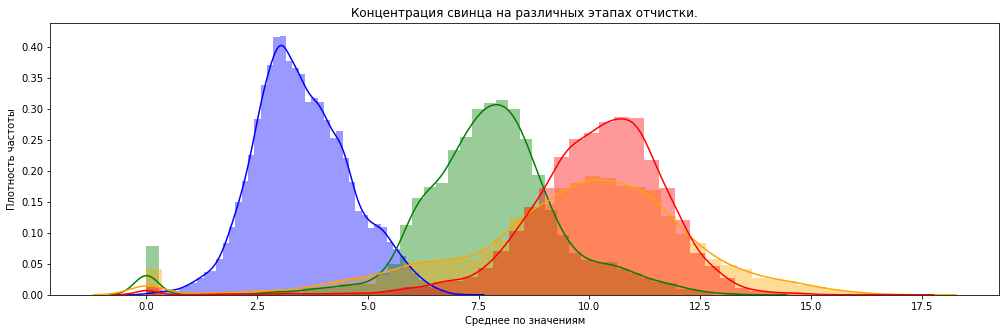

In [12]:
concentration_plot(['rougher.input.feed_pb', 
                    'rougher.output.concentrate_pb', 
                    'primary_cleaner.output.concentrate_pb', 
                    'final.output.concentrate_pb'], 
                    'Концентрация свинца на различных этапах отчистки.')

После флотрации и первичной отчистки концентрация свинца растёт. После вторичной отчистки наблюдается увеличение частоты встречаемости значений концентрации свинца, которые были на пике частоты у первичной отчистки, но сама по себе концентрация не сильно меняется.

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

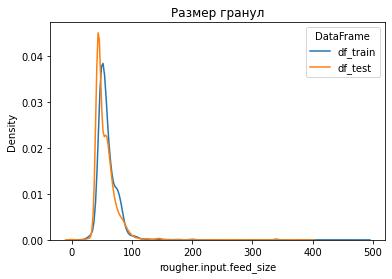

In [13]:
for frame,name in zip([without_nan, test_without_nan], ["df_train", "df_test"]):
    subset = frame["rougher.input.feed_size"]

    sns.distplot(subset, hist = False, kde = True, label = name)

plt.legend(prop={'size': 10}, title = 'DataFrame')
plt.title('Размер гранул')
plt.show()

Есть небольшое отличие в размере гранул.

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [14]:
def summary_of_concentarution(row):
    list_of_steps = ["rougher","primary_cleaner","final"]
    input_feed_au = row["rougher.input.feed_au"]
    input_feed_ag = row["rougher.input.feed_ag"]
    input_feed_pb = row["rougher.input.feed_pb"]
    input_feed_sol = row["rougher.input.feed_sol"]
    
    out_rougher = []
    out_primary_cleaner = []
    out_final = []
    
    list_of_arrays =[out_rougher, out_primary_cleaner, out_final]
    
    for step, array in zip(list_of_steps, list_of_arrays):
        array.append(row[step+".output.concentrate_au"])
        array.append(row[step+".output.concentrate_ag"])
        array.append(row[step+".output.concentrate_pb"])
        array.append(row[step+".output.concentrate_sol"])
        
    sum_before_steps = input_feed_ag + input_feed_au + input_feed_pb + input_feed_sol
    sum_rougher = sum(out_rougher) 
    sum_primary = sum(out_primary_cleaner)
    sum_final = sum(out_final)
    return pd.Series([sum_before_steps, sum_rougher, sum_primary, sum_final])

In [15]:
sum_values = without_nan.apply(summary_of_concentarution,axis = 1)
sum_values.columns = ["before_rougher","rougher","primary_cleaner","final"]
sum_values

,before_rougher,rougher,primary_cleaner,final
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
14144,53.415050,70.781325,59.001692,68.098589
14145,53.696482,70.539603,59.703912,68.274362
14146,54.589604,55.376330,59.561096,68.226068
14147,54.027355,69.201689,57.216686,68.200449


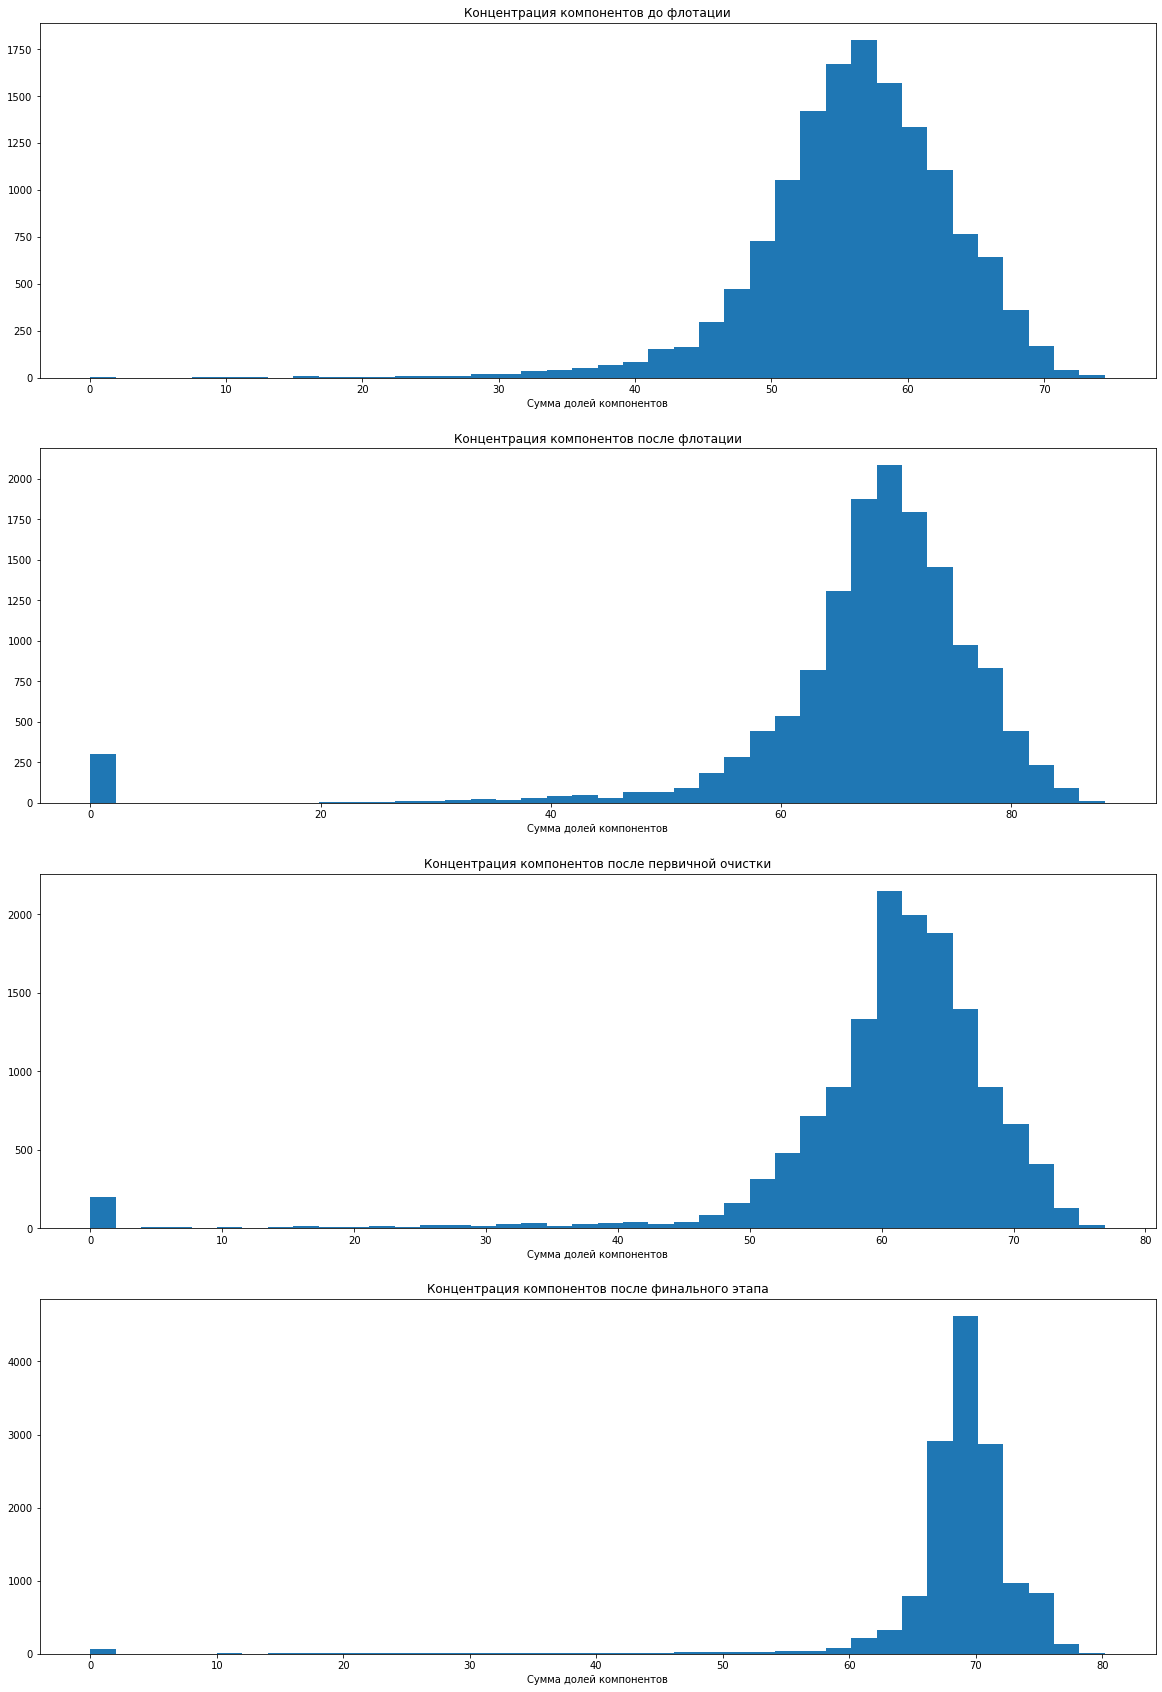

In [16]:
fig,ax = plt.subplots(4,1,figsize = (20,30))

ax[0].hist(sum_values["before_rougher"],bins = 40)
ax[1].hist(sum_values["rougher"],bins = 40)
ax[2].hist(sum_values["primary_cleaner"],bins = 40)
ax[3].hist(sum_values["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
plt.show()

Можно заметить скопление значений возле нуля во всех распределениях. Удалим их из тренировочной и тестовой выборки.

In [17]:
columns_with_outliers_train = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                               'rougher.input.feed_pb', 'rougher.input.feed_sol',
                               'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                               'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                               'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                               'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
                               'final.output.concentrate_au', 'final.output.concentrate_ag', 
                               'final.output.concentrate_pb', 'final.output.concentrate_sol']

columns_with_outliers_test = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 'rougher.input.feed_sol']

for name_column in columns_with_outliers_train:
    without_nan = without_nan.drop(index = without_nan[without_nan[name_column] < 1].index,axis = 0) 
    
for name_column in columns_with_outliers_test:
    test_frame = test_frame.drop(index = test_frame[test_frame[name_column] < 1].index,axis = 0)  

Построим графики суммарной концентрации после удаления выбросов.

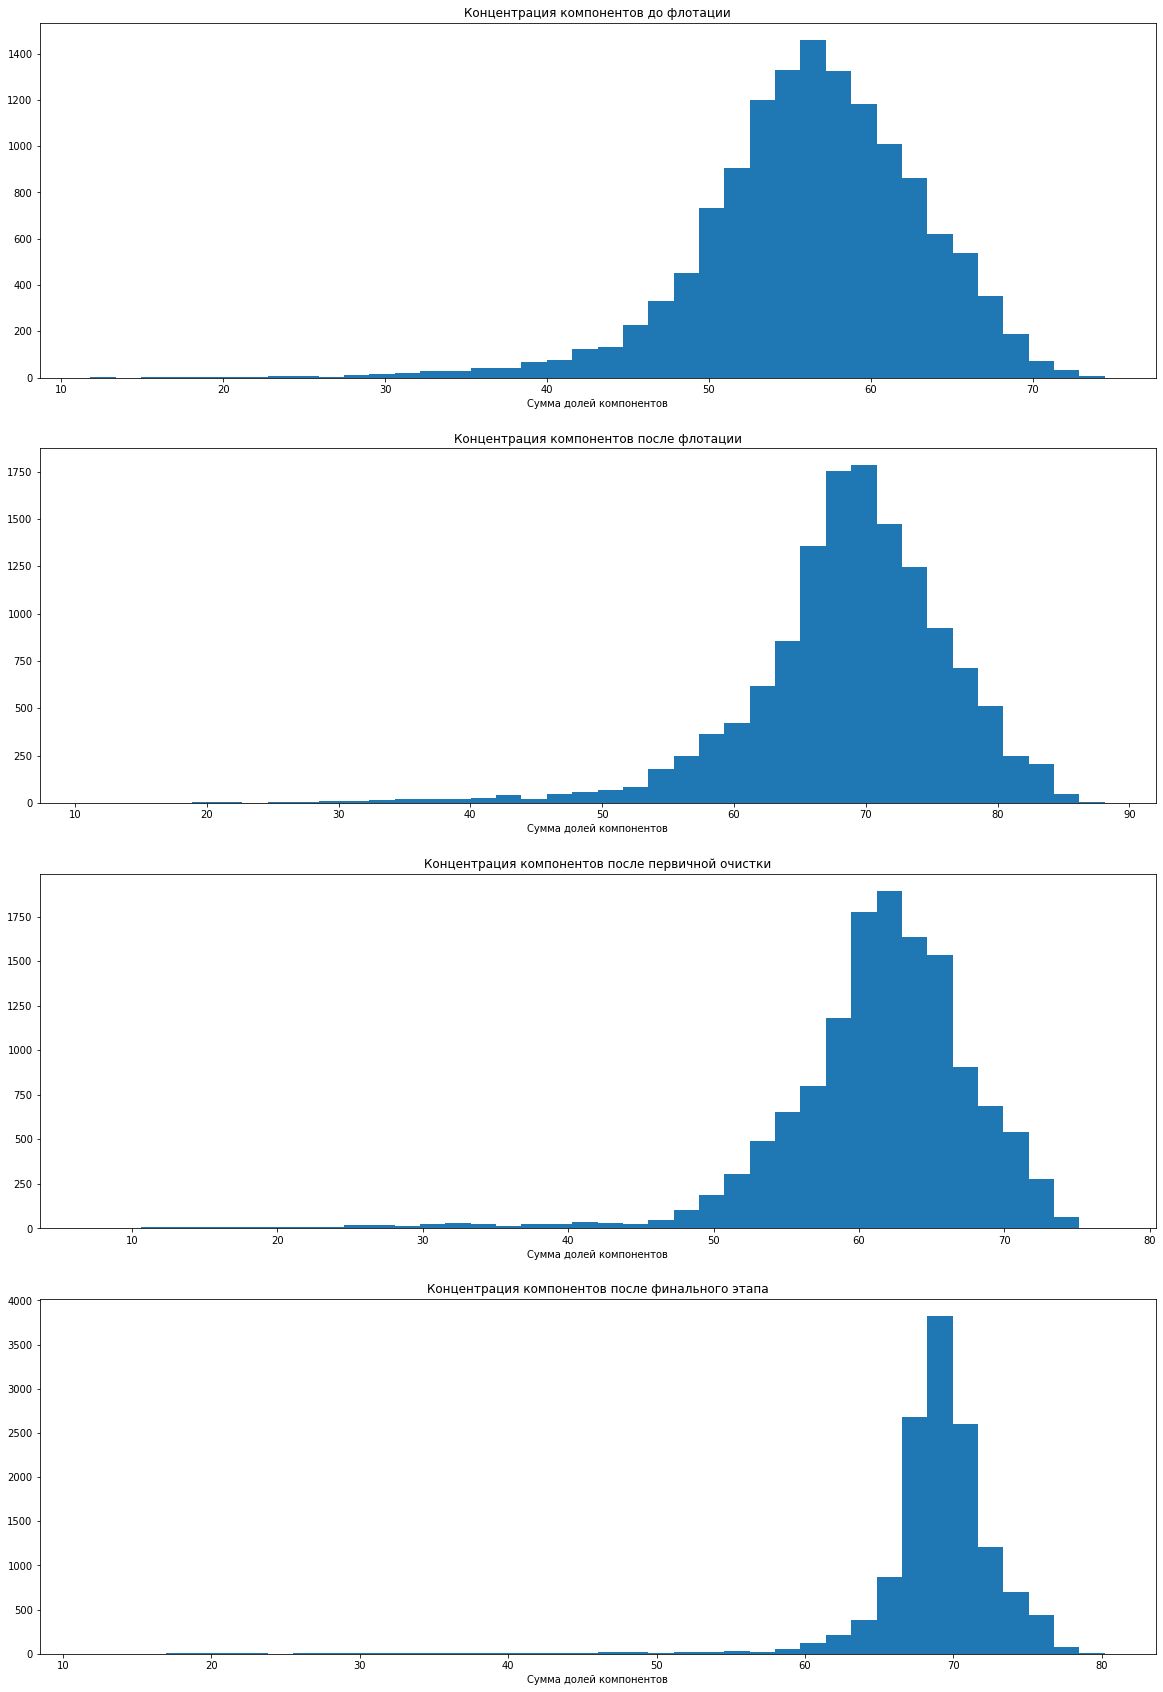

In [18]:
sum_values = without_nan.apply(summary_of_concentarution, axis = 1)
sum_values.columns = ["before_rougher", "rougher", "primary_cleaner", "final"]

fig,ax = plt.subplots(4,1,figsize = (20,30))

ax[0].hist(sum_values["before_rougher"],bins = 40)
ax[1].hist(sum_values["rougher"],bins = 40)
ax[2].hist(sum_values["primary_cleaner"],bins = 40)
ax[3].hist(sum_values["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
plt.show()

## Модель

Признаки:  
* `features_train_rougher`  
* `features_train_final`
* `features_test_rougher`  
* `features_test_final` 

Целевые признаки:  
* `target_train_rougher`  
* `target_train_final`
* `target_test_rougher`  
* `target_test_final`

In [19]:
train_features_dataset_rougher = without_nan.loc[:,test_frame.columns]
train_target_dataset_rougher = without_nan['rougher.output.recovery']
train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = without_nan['final.output.recovery']

Напишем функцию для вычисления итоговой sMAPE.

In [20]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

custom_score = make_scorer(sMAPE,greater_is_better=False)

Инициализируем pipeline. Будем проверять следующие модели: Random Forest и Decision Tree.

In [21]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())

Определим параметры для Random Forest и Decision Tree.

In [22]:
params_RF = {"randomforestregressor__n_estimators":[5,50],
             "randomforestregressor__max_depth":[1,10]}
params_DT= {"decisiontreeregressor__max_depth":[1,50]}

In [23]:
grid_rougher = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_final = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)

Обучим модели.

In [24]:
grid_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final.fit(train_features_dataset_final,train_target_dataset_final)
grid_rougher_DT.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final,train_target_dataset_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 50]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

Выведем лучшие парамеры для модели.

In [25]:
print("Лучшие параметры для моделей")
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие параметры для моделей
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


Выведем значения sMAPE для каждой модели.

In [26]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

print('sMAPE моделей при обучении:')
print("rougher")
print("RandomForest ", best_score_rougher)
print("DecisionTree ", best_score_rougher_DT)
print()
print("final")
print("RandomForest ",best_score_final)
print("DecisionTree ",best_score_final_DT)

sMAPE моделей при обучении:
rougher
RandomForest  -6.544928325119505
DecisionTree  -7.9627953308963555

final
RandomForest  -9.332773110851427
DecisionTree  -9.502834455132577


Лучше всего с данными справляется Random Forest.

In [27]:
print('финальный sMAPE моделей:')
print("rougher")
print("RandomForest ", final_sMAPE(best_score_rougher,best_score_final))
print("DecisionTree ", final_sMAPE(best_score_rougher_DT,best_score_final_DT))

финальный sMAPE моделей:
rougher
RandomForest  -8.635811914418447
DecisionTree  -9.117824674073521


Снова лучше всего показала себя модель RandomForest, так что будем считать её лучшей моделью.

Проверим лучшую модель на тестовой выборке.

In [28]:
rogher_test = grid_rougher.predict(test_without_nan)
final_test = grid_final.predict(test_without_nan)

print("sMAPE на тестовой выборке ",final_sMAPE(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test)))

sMAPE на тестовой выборке  9.162263895321814


Сравним нашу модель с константной.

In [29]:
base = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")

base.fit(train_features_dataset_rougher,train_target_dataset_rougher)
base_final.fit(train_features_dataset_final,train_target_dataset_final)

base_rougher = base.predict(test_without_nan)
base_final_pred = base_final.predict(test_without_nan)

print("sMAPE константной модели ", final_sMAPE(sMAPE(target_test_rougher,base_rougher),sMAPE(target_test_final,base_final_pred)))

sMAPE константной модели  9.44138312943423


Ошибка константной модели больше, чем RandomForest, значит модель адекватна.

## Вывод

1. Подготовка данных.
* Данные проанализированы и обработаны.
* Показатель эффективности обогащения рассчитан корректно.
* Быи найдены признаки, недоступные в тестовой выборке.

2. Анализ данных.

* Проанализированы концентрации металлов (Au, Ag, Pb) на всех стадиях очистки.
* Изучены распределения гранул сырья для обучающей и тестовой выборок.
* Исследованна суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

3. Модель.

* Рассмотрены модели RandomForest и DecisionTree.
* RandomForest показала себя лучше и была принята за основную модель.
* На тестовой выборке модель показала sMAPE = 9.15.
* sMape модели RandomForest меньше, чем у константной, модель признаётся адекватной.